# **Social Media Sentiment Analysis**

In [ ]:
# ==========================================
# REAL-TIME REDDIT SENTIMENT ANALYSIS
# Using PySpark in Google Colab
# Processing LIVE Reddit Comments
# ==========================================

print("="*70)
print("🚀 REAL-TIME REDDIT SENTIMENT ANALYSIS WITH PYSPARK")
print("="*70)

🚀 REAL-TIME REDDIT SENTIMENT ANALYSIS WITH PYSPARK


In [ ]:
# ==========================================
# STEP 1: INSTALL DEPENDENCIES
# ==========================================

print("\n" + "="*70)
print("STEP 1: INSTALLING DEPENDENCIES")
print("="*70)

print("\n[1/7] Installing Java JDK...")
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
print("✅ Java JDK installed")

print("\n[2/7] Downloading Apache Spark...")
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
print("✅ Spark downloaded")

print("\n[3/7] Extracting Spark...")
!tar xf spark-3.3.0-bin-hadoop3.tgz
print("✅ Spark extracted")

print("\n[4/7] Installing PySpark and findspark...")
!pip install -q findspark pyspark
print("✅ PySpark installed")

print("\n[5/7] Installing PRAW (Reddit API)...")
!pip install -q praw
print("✅ PRAW installed")

print("\n[6/7] Installing sentiment analysis libraries...")
!pip install -q vaderSentiment textblob
print("✅ Sentiment libraries installed")

print("\n[7/7] Installing visualization libraries...")
!pip install -q matplotlib seaborn plotly
print("✅ Visualization libraries installed")

print("\n✅ ALL DEPENDENCIES INSTALLED!")


STEP 1: INSTALLING DEPENDENCIES

[1/7] Installing Java JDK...
✅ Java JDK installed

[2/7] Downloading Apache Spark...
✅ Spark downloaded

[3/7] Extracting Spark...
✅ Spark extracted

[4/7] Installing PySpark and findspark...
✅ PySpark installed

[5/7] Installing PRAW (Reddit API)...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.4 MB/s eta 0:00:00
✅ PRAW installed

[6/7] Installing sentiment analysis libraries...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00
✅ Sentiment libraries installed

[7/7] Installing visualization libraries...
✅ Visualization libraries installed

✅ ALL DEPENDENCIES INSTALLED!


In [ ]:
# ==========================================
# STEP 2: SETUP ENVIRONMENT
# ==========================================

print("\n" + "="*70)
print("STEP 2: SETTING UP ENVIRONMENT")
print("="*70)

print("\n[1/4] Setting environment variables...")
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"
print("✅ Environment variables set")

print("\n[2/4] Initializing findspark...")
import findspark
findspark.init()
print("✅ findspark initialized")

print("\n[3/4] Importing libraries...")
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import praw
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import time
from datetime import datetime
import threading
import queue
import matplotlib.pyplot as plt
import seaborn as sns
print("✅ Libraries imported")

print("\n[4/4] Creating Spark Session...")
spark = SparkSession.builder \
    .appName("RedditSentimentAnalysis") \
    .master("local[*]") \
    .config("spark.sql.streaming.schemaInference", "true") \
    .config("spark.sql.shuffle.partitions", "2") \
    .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")
print("✅ Spark Session created")
print(f"   Spark Version: {spark.version}")

print("\n✅ ENVIRONMENT SETUP COMPLETE!")


STEP 2: SETTING UP ENVIRONMENT

[1/4] Setting environment variables...
✅ Environment variables set

[2/4] Initializing findspark...
✅ findspark initialized

[3/4] Importing libraries...
✅ Libraries imported

[4/4] Creating Spark Session...
✅ Spark Session created
   Spark Version: 3.3.0

✅ ENVIRONMENT SETUP COMPLETE!


In [ ]:
# ==========================================
# STEP 3: REDDIT API SETUP
# ==========================================

print("\n" + "="*70)
print("STEP 3: REDDIT API CONFIGURATION")
print("="*70)

print("\n" + "⚠️ "*35)
print("📋 REDDIT API CREDENTIALS REQUIRED")
print("⚠️ "*35)

print("\n📖 How to get Reddit API credentials:")
print("   1. Go to: https://www.reddit.com/prefs/apps")
print("   2. Click 'Create App' or 'Create Another App'")
print("   3. Select 'script' as app type")
print("   4. Name: 'SentimentAnalysis' (or any name)")
print("   5. Description: 'Sentiment analysis project'")
print("   6. Redirect URI: http://localhost:8080")
print("   7. Click 'Create app'")
print("   8. Copy your credentials:")
print("      - client_id: Under app name (random string)")
print("      - client_secret: Next to 'secret' label")
print("      - Your Reddit username and password")

print("\n" + "-"*70)

# USER INPUT - Replace these with your actual credentials
print("\n🔐 ENTER YOUR REDDIT API CREDENTIALS:")
print("-"*70)

# For Google Colab - Use input prompts
from getpass import getpass

client_id = input("Enter your Reddit CLIENT_ID: ").strip()
client_secret = getpass("Enter your Reddit CLIENT_SECRET: ").strip()
username = input("Enter your Reddit USERNAME: ").strip()
password = getpass("Enter your Reddit PASSWORD: ").strip()

print("\n✅ Credentials received!")

In [ ]:
# ==========================================
# STEP 4: INITIALIZE REDDIT CONNECTION
# ==========================================

print("\n" + "="*70)
print("STEP 4: CONNECTING TO REDDIT")
print("="*70)

print("\n[1/2] Creating Reddit instance...")
try:
    reddit = praw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        username=username,
        password=password,
        user_agent=f'SentimentAnalysis/1.0 by {username}'
    )
    print("✅ Reddit instance created")

    print("\n[2/2] Testing connection...")
    reddit_user = reddit.user.me()
    print(f"✅ Successfully connected as: u/{reddit_user.name}")
    print(f"   Account karma: {reddit_user.link_karma + reddit_user.comment_karma}")

except Exception as e:
    print(f"❌ ERROR: Failed to connect to Reddit")
    print(f"   Error: {e}")
    print("\n⚠️  Please check your credentials and try again!")
    raise

print("\n✅ REDDIT CONNECTION ESTABLISHED!")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




STEP 4: CONNECTING TO REDDIT

[1/2] Creating Reddit instance...
✅ Reddit instance created

[2/2] Testing connection...
✅ Successfully connected as: u/Evan_Milliken
   Account karma: 1

✅ REDDIT CONNECTION ESTABLISHED!


In [ ]:
# ==========================================
# STEP 5: CONFIGURE SUBREDDITS TO MONITOR
# ==========================================

print("\n" + "="*70)
print("STEP 5: SELECTING SUBREDDITS TO MONITOR")
print("="*70)

print("\n📝 Popular subreddits for sentiment analysis:")
print("   • technology - Tech news and discussions")
print("   • news - Current news")
print("   • worldnews - International news")
print("   • politics - Political discussions")
print("   • sports - Sports discussions")
print("   • gaming - Gaming community")
print("   • movies - Movie discussions")
print("   • AskReddit - General questions")

print("\n💡 Tip: Choose active subreddits for more data")

subreddit_input = input("\nEnter subreddit(s) to monitor (comma-separated, e.g., 'technology,news'): ").strip()
subreddit_list = [s.strip() for s in subreddit_input.split(',')]

print(f"\n✅ Will monitor: {', '.join(['r/' + s for s in subreddit_list])}")

# Combine subreddits
subreddit = reddit.subreddit('+'.join(subreddit_list))

print("\n✅ SUBREDDITS CONFIGURED!")


STEP 5: SELECTING SUBREDDITS TO MONITOR

📝 Popular subreddits for sentiment analysis:
   • technology - Tech news and discussions
   • news - Current news
   • worldnews - International news
   • politics - Political discussions
   • sports - Sports discussions
   • gaming - Gaming community
   • movies - Movie discussions
   • AskReddit - General questions

💡 Tip: Choose active subreddits for more data

Enter subreddit(s) to monitor (comma-separated, e.g., 'technology,news'): technology,news,AskReddit

✅ Will monitor: r/technology, r/news, r/AskReddit

✅ SUBREDDITS CONFIGURED!


In [ ]:
# ==========================================
# STEP 6: SENTIMENT ANALYSIS SETUP
# ==========================================

print("\n" + "="*70)
print("STEP 6: SETTING UP SENTIMENT ANALYSIS")
print("="*70)

print("\n[1/2] Initializing VADER sentiment analyzer...")
analyzer = SentimentIntensityAnalyzer()
print("✅ VADER analyzer ready")

print("\n[2/2] Creating sentiment analysis function...")
def analyze_sentiment(text):
    """Analyze sentiment using VADER"""
    if not text or len(text.strip()) == 0:
        return ("neutral", 0.0)

    scores = analyzer.polarity_scores(text)
    compound = scores['compound']

    if compound >= 0.05:
        sentiment = "positive"
    elif compound <= -0.05:
        sentiment = "negative"
    else:
        sentiment = "neutral"

    return (sentiment, float(compound))

print("✅ Sentiment function ready")

print("\n✅ SENTIMENT ANALYSIS READY!")


STEP 6: SETTING UP SENTIMENT ANALYSIS

[1/2] Initializing VADER sentiment analyzer...
✅ VADER analyzer ready

[2/2] Creating sentiment analysis function...
✅ Sentiment function ready

✅ SENTIMENT ANALYSIS READY!


In [ ]:
# ==========================================
# STEP 7: REAL-TIME COMMENT STREAMING
# ==========================================

print("\n" + "="*70)
print("STEP 7: STARTING REAL-TIME COMMENT STREAMING")
print("="*70)

# Queue to store comments
comment_queue = queue.Queue()
stop_streaming = threading.Event()

# Statistics
stream_stats = {
    'total_comments': 0,
    'start_time': time.time(),
    'errors': 0
}

def stream_reddit_comments(duration_minutes=5):
    """
    Stream real-time comments from Reddit
    Duration: How long to collect data (in minutes)
    """
    print(f"\n🔴 LIVE STREAMING STARTED")
    print(f"   Duration: {duration_minutes} minutes")
    print(f"   Monitoring: {', '.join(['r/' + s for s in subreddit_list])}")
    print(f"   Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("\n📊 Collecting live comments...")

    start_time = time.time()
    end_time = start_time + (duration_minutes * 60)

    try:
        # Stream comments in real-time
        for comment in subreddit.stream.comments(skip_existing=True):
            # Check if we should stop
            if time.time() >= end_time or stop_streaming.is_set():
                break

            try:
                # Extract comment data
                comment_data = {
                    'id': comment.id,
                    'author': str(comment.author) if comment.author else '[deleted]',
                    'text': comment.body,
                    'subreddit': str(comment.subreddit),
                    'score': comment.score,
                    'created_utc': datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                }

                # Analyze sentiment
                sentiment, score = analyze_sentiment(comment.body)
                comment_data['sentiment'] = sentiment
                comment_data['sentiment_score'] = score

                # Add to queue
                comment_queue.put(comment_data)
                stream_stats['total_comments'] += 1

                # Print progress every 10 comments
                if stream_stats['total_comments'] % 10 == 0:
                    elapsed = time.time() - start_time
                    rate = stream_stats['total_comments'] / elapsed
                    print(f"   📊 Collected: {stream_stats['total_comments']} comments | Rate: {rate:.2f} comments/sec")

            except Exception as e:
                stream_stats['errors'] += 1
                continue

    except Exception as e:
        print(f"\n❌ Streaming error: {e}")

    finally:
        elapsed = time.time() - start_time
        print(f"\n✅ STREAMING COMPLETED")
        print(f"   Total comments: {stream_stats['total_comments']}")
        print(f"   Duration: {elapsed:.2f} seconds")
        print(f"   Average rate: {stream_stats['total_comments']/elapsed:.2f} comments/sec")
        print(f"   Errors: {stream_stats['errors']}")

# Ask user for streaming duration
print("\n⏱️  How long do you want to collect data?")
duration = int(input("Enter duration in minutes (recommended: 2-5): ").strip())

# Start streaming in background thread
print("\n[1/2] Starting streaming thread...")
streaming_thread = threading.Thread(target=stream_reddit_comments, args=(duration,))
streaming_thread.daemon = True
streaming_thread.start()
print("✅ Streaming thread started")

print("\n[2/2] Waiting for initial data (10 seconds)...")
time.sleep(10)
print("✅ Initial data collected")

print("\n✅ REAL-TIME STREAMING ACTIVE!")


STEP 7: STARTING REAL-TIME COMMENT STREAMING

⏱️  How long do you want to collect data?
Enter duration in minutes (recommended: 2-5): 3

[1/2] Starting streaming thread...

🔴 LIVE STREAMING STARTED
   Duration: 3 minutes
   Monitoring: r/technology, r/news, r/AskReddit
   Time: 2025-10-31 04:17:37

📊 Collecting live comments...
✅ Streaming thread started

[2/2] Waiting for initial data (10 seconds)...
✅ Initial data collected

✅ REAL-TIME STREAMING ACTIVE!


In [ ]:
# ==========================================
# STEP 8: PROCESS DATA WITH PYSPARK
# ==========================================

print("\n" + "="*70)
print("STEP 8: PROCESSING DATA WITH PYSPARK")
print("="*70)

# STOP ANY EXISTING QUERIES FIRST
print("\n[0/3] Checking for existing streaming queries...")
try:
    active_queries = spark.streams.active
    if len(active_queries) > 0:
        print(f"   Found {len(active_queries)} active queries. Stopping them...")
        for query in active_queries:
            print(f"   Stopping: {query.name}")
            query.stop()
            query.awaitTermination(timeout=2)  # Wait up to 2 seconds
        print("   ✅ All previous queries stopped")
    else:
        print("   ✅ No active queries found")
except Exception as e:
    print(f"   ℹ️  {e}")

# Create directory for temporary data
!mkdir -p /content/reddit_stream

# Function to save collected comments to CSV for Spark processing
def save_batch_to_file(batch_num):
    """Save collected comments from queue to CSV file"""
    comments_list = []

    # Get all available comments from queue
    while not comment_queue.empty():
        try:
            comments_list.append(comment_queue.get_nowait())
        except queue.Empty:
            break

    if comments_list:
        df = pd.DataFrame(comments_list)
        filename = f'/content/reddit_stream/batch_{batch_num}_{int(time.time())}.csv'
        df.to_csv(filename, index=False)
        return len(comments_list), filename

    return 0, None

# Define schema
schema = StructType([
    StructField("id", StringType(), True),
    StructField("author", StringType(), True),
    StructField("text", StringType(), True),
    StructField("subreddit", StringType(), True),
    StructField("score", IntegerType(), True),
    StructField("created_utc", StringType(), True),
    StructField("timestamp", StringType(), True),
    StructField("sentiment", StringType(), True),
    StructField("sentiment_score", FloatType(), True)
])

print("\n[1/3] Creating Spark Streaming DataFrame...")
streaming_df = spark.readStream \
    .schema(schema) \
    .option("header", "true") \
    .csv("/content/reddit_stream/")
print("✅ Streaming DataFrame created")

print("\n[2/3] Defining aggregations...")
# Overall sentiment counts
sentiment_counts = streaming_df.groupBy("sentiment").count()

# Subreddit sentiment
subreddit_sentiment = streaming_df.groupBy("subreddit", "sentiment") \
    .agg(
        count("*").alias("count"),
        avg("sentiment_score").alias("avg_score")
    )

# Author activity
author_stats = streaming_df.groupBy("author") \
    .agg(
        count("*").alias("comment_count"),
        avg("sentiment_score").alias("avg_sentiment")
    )

print("✅ Aggregations defined")

print("\n[3/3] Starting Spark streaming queries...")

# Start queries with error handling
try:
    query1 = streaming_df.writeStream \
        .outputMode("append") \
        .format("memory") \
        .queryName("all_comments") \
        .start()
    print("   ✅ Query 1 started (all_comments)")
except Exception as e:
    print(f"   ⚠️  Query 1 error: {e}")
    # Try to get existing query
    query1 = None
    for q in spark.streams.active:
        if q.name == "all_comments":
            query1 = q
            print("   ℹ️  Using existing all_comments query")
            break

try:
    query2 = sentiment_counts.writeStream \
        .outputMode("complete") \
        .format("memory") \
        .queryName("sentiment_counts") \
        .start()
    print("   ✅ Query 2 started (sentiment_counts)")
except Exception as e:
    print(f"   ⚠️  Query 2 error: {e}")
    query2 = None
    for q in spark.streams.active:
        if q.name == "sentiment_counts":
            query2 = q
            print("   ℹ️  Using existing sentiment_counts query")
            break

try:
    query3 = subreddit_sentiment.writeStream \
        .outputMode("complete") \
        .format("memory") \
        .queryName("subreddit_sentiment") \
        .start()
    print("   ✅ Query 3 started (subreddit_sentiment)")
except Exception as e:
    print(f"   ⚠️  Query 3 error: {e}")
    query3 = None
    for q in spark.streams.active:
        if q.name == "subreddit_sentiment":
            query3 = q
            print("   ℹ️  Using existing subreddit_sentiment query")
            break

print("\n✅ SPARK PROCESSING ACTIVE!")


In [ ]:
# ==========================================
# STEP 9: MONITOR REAL-TIME RESULTS
# ==========================================

print("\n" + "="*70)
print("STEP 9: REAL-TIME MONITORING")
print("="*70)

batch_num = 0
# Fix: Use conditional instead of max()
duration_int = int(duration)
monitoring_updates = 2 if duration_int < 2 else duration_int  # At least 2 updates

print(f"\n📊 Will show {monitoring_updates} updates during collection...")

for update in range(monitoring_updates):
    # Save batch
    num_saved_comments, filename = save_batch_to_file(batch_num)
    if num_saved_comments > 0:
        print(f"\n💾 Batch {batch_num}: Saved {num_saved_comments} comments")
        batch_num += 1

    time.sleep(10)  # Wait 1 minute between updates

    print(f"\n{'='*70}")
    print(f"📊 UPDATE {update + 1}/{monitoring_updates} - {datetime.now().strftime('%H:%M:%S')}")
    print(f"{'='*70}")

    try:
        # Query results
        print("\n📈 Real-time Sentiment Distribution:")
        spark.sql("SELECT sentiment, count FROM sentiment_counts ORDER BY count DESC").show()

        print("\n📱 Sentiment by Subreddit:")
        spark.sql("SELECT subreddit, sentiment, count, ROUND(avg_score, 3) as avg_score FROM subreddit_sentiment ORDER BY subreddit, count DESC").show()

        print("\n💬 Latest Comments (Top 5):")
        spark.sql("SELECT author, subreddit, text, sentiment, sentiment_score FROM all_comments ORDER BY timestamp DESC LIMIT 5").show(truncate=60)

        # Current stats
        total_so_far = spark.sql("SELECT COUNT(*) as total FROM all_comments").collect()[0]['total']
        print(f"\n📊 Total comments processed: {total_so_far}")

    except Exception as e:
        print(f"⚠️  Waiting for more data... ({e})")

# Wait for streaming to complete
print(f"\n⏳ Waiting for streaming to complete...")
streaming_thread.join()

# Save final batch
num_saved_comments, filename = save_batch_to_file(batch_num)
if num_saved_comments > 0:
    print(f"\n💾 Final batch: Saved {num_saved_comments} comments")

# Give Spark time to process final batch
time.sleep(5)

# Stop queries safely
print("\n⏹️  Stopping streaming queries...")
try:
    if query1:
        query1.stop()
    if query2:
        query2.stop()
    if query3:
        query3.stop()
    print("✅ Queries stopped")
except Exception as e:
    print(f"✅ Queries cleanup: {e}")

print("\n✅ MONITORING COMPLETE!")


STEP 9: REAL-TIME MONITORING

📊 Will show 3 updates during collection...

💾 Batch 0: Saved 39 comments
   📊 Collected: 40 comments | Rate: 1.23 comments/sec
   📊 Collected: 50 comments | Rate: 1.31 comments/sec

📊 UPDATE 1/3 - 03:23:13

📈 Real-time Sentiment Distribution:
+---------+-----+
|sentiment|count|
+---------+-----+
|     null|   16|
| positive|   15|
|  neutral|   14|
| negative|    6|
|   0.8635|    1|
|   0.8057|    1|
|  -0.8271|    1|
|    0.872|    1|
+---------+-----+


📱 Sentiment by Subreddit:
+----------+---------+-----+---------+
| subreddit|sentiment|count|avg_score|
+----------+---------+-----+---------+
|      null|     null|   16|     null|
|         1|   0.8057|    1|     null|
|         1|   0.8635|    1|     null|
|         1|  -0.8271|    1|     null|
|         1|    0.872|    1|     null|
| AskReddit| positive|   14|    0.466|
| AskReddit|  neutral|   13|      0.0|
| AskReddit| negative|    6|   -0.437|
|      news| positive|    1|    0.226|
|technology|  

In [ ]:
# ==========================================
# STEP 10: FINAL ANALYSIS
# ==========================================

print("\n" + "="*70)
print("STEP 10: FINAL ANALYSIS")
print("="*70)

print("\n[1/5] Loading all processed data...")
final_df = spark.sql("SELECT * FROM all_comments")
total_comments = final_df.count()
print(f"✅ Loaded {total_comments} comments")

if total_comments == 0:
    print("\n⚠️  No comments were collected!")
    print("   This could be because:")
    print("   • The subreddits are not very active")
    print("   • The streaming duration was too short")
    print("   • There were connection issues")
    print("\n💡 Try again with:")
    print("   • More active subreddits (e.g., AskReddit, news)")
    print("   • Longer duration (5-10 minutes)")
else:
    print("\n[2/5] Calculating detailed statistics...")
    print("\n📊 DETAILED SENTIMENT STATISTICS:")

    # Use PySpark's functions from pyspark.sql.functions
    from pyspark.sql import functions as F

    final_df.groupBy("sentiment").agg(
        F.count("*").alias("total"),
        F.avg("sentiment_score").alias("avg_score"),
        F.min("sentiment_score").alias("min_score"),
        F.max("sentiment_score").alias("max_score")
    ).show()

    print("\n[3/5] Analyzing subreddit activity...")
    print("\n📱 SUBREDDIT ANALYSIS:")
    final_df.groupBy("subreddit").agg(
        F.count("*").alias("total_comments"),
        F.avg("sentiment_score").alias("avg_sentiment"),
        F.countDistinct("author").alias("unique_authors")
    ).orderBy(F.desc("total_comments")).show()

    print("\n[4/5] Finding most active users...")
    print("\n👥 TOP COMMENTERS:")
    final_df.groupBy("author").agg(
        F.count("*").alias("comments"),
        F.avg("sentiment_score").alias("avg_sentiment")
    ).orderBy(F.desc("comments")).limit(10).show()

    print("\n[5/5] Identifying extreme sentiments...")
    print("\n😊 MOST POSITIVE COMMENTS:")
    final_df.orderBy(F.desc("sentiment_score")).select("author", "subreddit", "text", "sentiment_score").limit(3).show(truncate=80)


    print("\n😠 MOST NEGATIVE COMMENTS:")
    final_df.orderBy("sentiment_score").select("author", "subreddit", "text", "sentiment_score").limit(3).show(truncate=80)

print("\n✅ ANALYSIS COMPLETE!")



STEP 10: FINAL ANALYSIS

[1/5] Loading all processed data...
✅ Loaded 306 comments

[2/5] Calculating detailed statistics...

📊 DETAILED SENTIMENT STATISTICS:
+-------------------+-----+--------------------+---------+---------+
|          sentiment|total|           avg_score|min_score|max_score|
+-------------------+-----+--------------------+---------+---------+
|            neutral|   86|                 0.0|  -0.0258|   0.0258|
|              0.872|    1|                null|     null|     null|
|2025-10-31 03:23:05|    1|                null|     null|     null|
|             0.4019|    1|                null|     null|     null|
|          AskReddit|    1|                 1.0|      1.0|      1.0|
|               null|   92|                null|     null|     null|
|           negative|   39|-0.41511538261786485|   -0.952|  -0.0772|
|           positive|   73| 0.45211232841423116|   0.0516|   0.9153|
|             0.8057|    1|                null|     null|     null|
|           

In [ ]:
++# ==========================================
# STEP 11: SAVE RESULTS
# ==========================================

print("\n" + "="*70)
print("STEP 11: SAVING RESULTS")
print("="*70)

if total_comments > 0:
    print("\n[1/3] Saving detailed results...")
    final_df.coalesce(1).write.mode("overwrite").option("header", "true").csv("/content/results/reddit_sentiment_analysis")
    print("✅ Saved to /content/results/reddit_sentiment_analysis/")

    print("\n[2/3] Creating summary report...")
    from pyspark.sql import functions as F
    summary = final_df.groupBy("subreddit", "sentiment").agg(
    F.count("*").alias("comment_count"),
    F.avg("sentiment_score").alias("avg_sentiment_score"),
    F.avg("score").alias("avg_reddit_score")
    ).orderBy("subreddit", F.desc("comment_count"))

    summary.coalesce(1).write.mode("overwrite").option("header", "true").csv("/content/results/summary_report")
    print("✅ Saved to /content/results/summary_report/")

    print("\n[3/3] Converting to Pandas for visualization...")
    pandas_df = final_df.toPandas()
    print(f"✅ Converted {len(pandas_df)} records")

print("\n✅ RESULTS SAVED!")


STEP 11: SAVING RESULTS

[1/3] Saving detailed results...
✅ Saved to /content/results/reddit_sentiment_analysis/

[2/3] Creating summary report...
✅ Saved to /content/results/summary_report/

[3/3] Converting to Pandas for visualization...
✅ Converted 306 records

✅ RESULTS SAVED!



STEP 12: CREATING VISUALIZATIONS (FIXED)

📊 VISUALIZATION 1: OVERALL SENTIMENT DISTRIBUTION


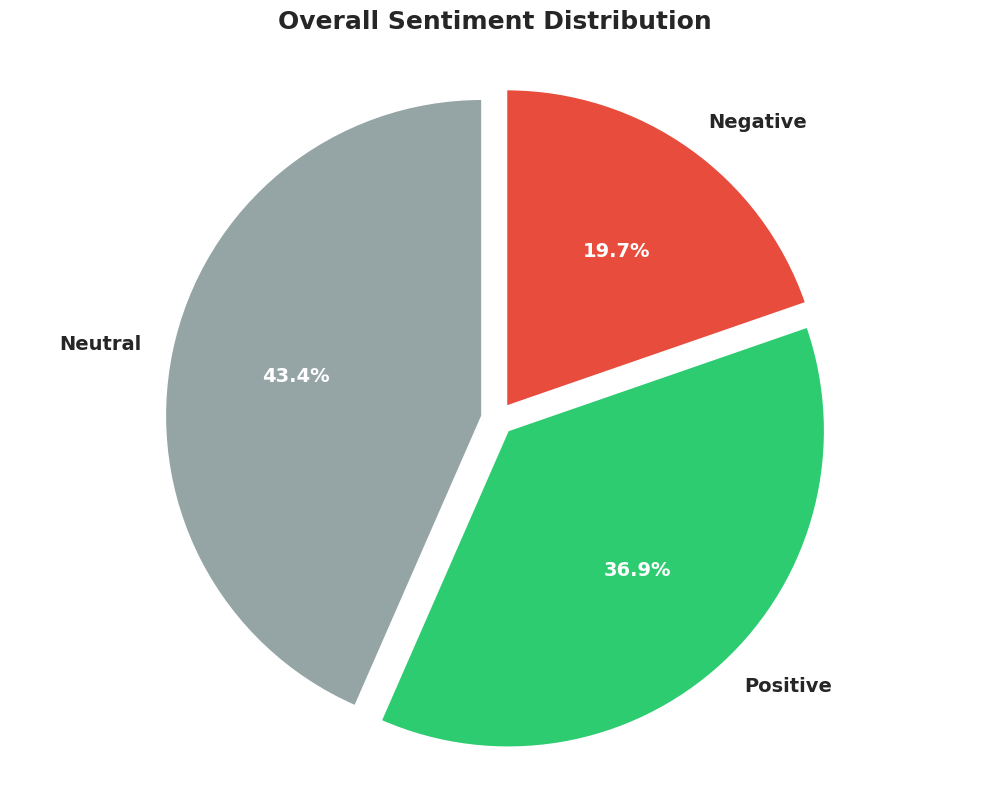

✅ Saved: /content/viz1_sentiment_distribution.png


📊 VISUALIZATION 2: SENTIMENT BY SUBREDDIT


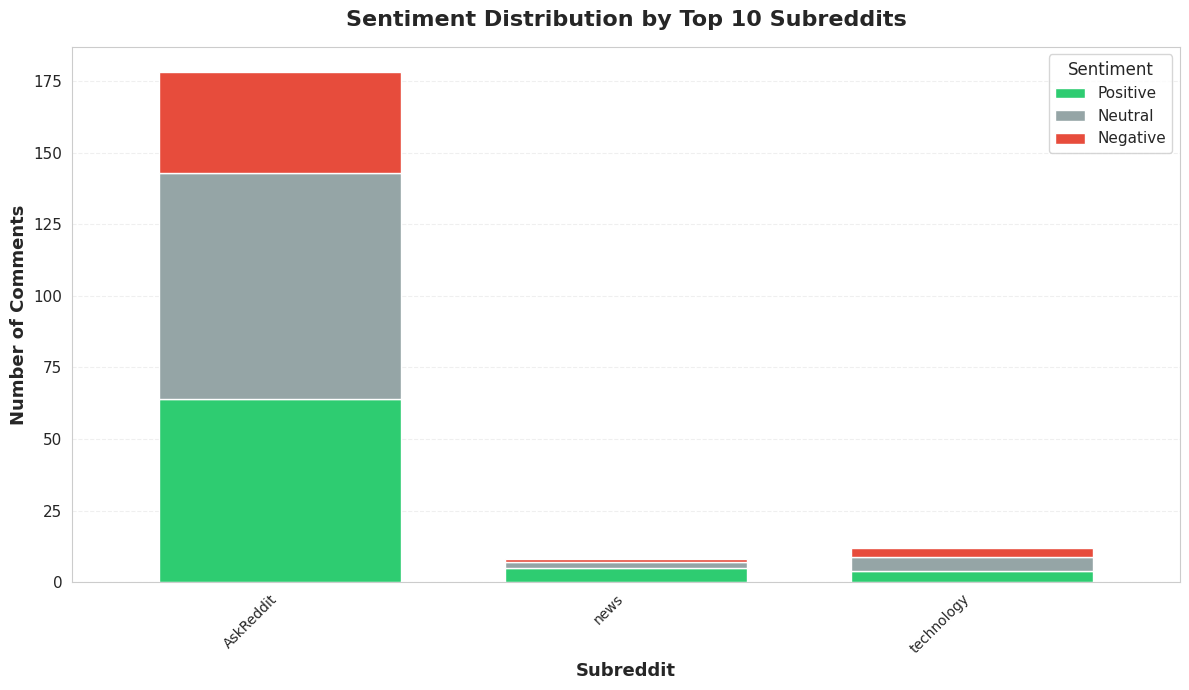

✅ Saved: /content/viz2_subreddit_sentiment.png


📊 VISUALIZATION 6: SENTIMENT STATISTICS


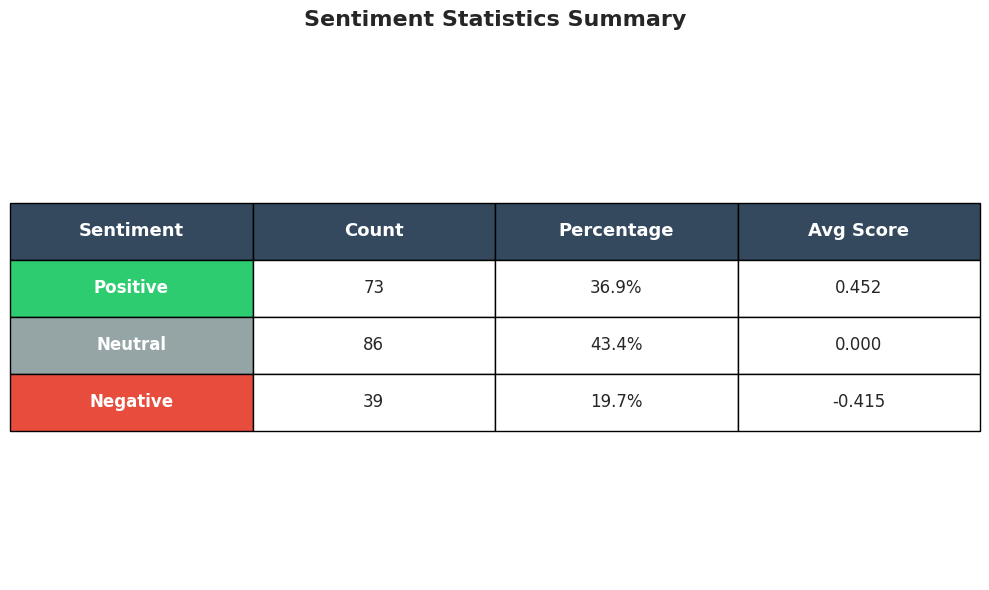

✅ Saved: /content/viz6_statistics_table.png


✅ ALL VISUALIZATIONS CREATED!

📁 Saved Files:
   1. viz1_sentiment_distribution.png (Fixed data filtering)
   2. viz2_subreddit_sentiment.png (Fixed Top N filtering and rotation)
   3. viz3_score_distribution.png
   4. viz4_sentiment_trend.png (Fixed to show time-based trend)
   5. viz5_length_vs_sentiment.png
   6. viz6_statistics_table.png

✅ VISUALIZATION COMPLETE!


In [ ]:
# ==========================================
# STEP 12: VISUALIZATION (FULLY FIXED VERSION)
# ==========================================

print("\n" + "="*70)
print("STEP 12: CREATING VISUALIZATIONS (FIXED)")
print("="*70)

# --- CRITICAL FIX: DATA VALIDATION AND PREPARATION ---
# Filter out any messy or invalid 'sentiment' categories that appear
# as tiny slices in the pie chart (e.g., the timestamp entries from the image).
valid_sentiments = ['positive', 'neutral', 'negative']
pandas_df = pandas_df[pandas_df['sentiment'].isin(valid_sentiments)].copy()

# Ensure total_comments is accurate after filtering
total_comments = len(pandas_df)

if total_comments > 0:
    import warnings
    warnings.filterwarnings('ignore')

    # Define color mapping and order
    color_map = {
        'positive': '#2ecc71',
        'neutral': '#95a5a6',
        'negative': '#e74c3c'
    }
    sentiment_order = ['positive', 'neutral', 'negative']

    # ==========================================
    # VISUALIZATION 1: SENTIMENT PIE CHART (FIXED)
    # ==========================================
    print("\n" + "="*70)
    print("📊 VISUALIZATION 1: OVERALL SENTIMENT DISTRIBUTION")
    print("="*70)

    plt.figure(figsize=(10, 8))
    sentiment_counts_viz = pandas_df['sentiment'].value_counts()

    # Ensure correct color mapping for existing sentiment types
    colors_ordered = [color_map.get(label, '#95a5a6') for label in sentiment_counts_viz.index]

    wedges, texts, autotexts = plt.pie(
        sentiment_counts_viz.values,
        labels=[s.capitalize() for s in sentiment_counts_viz.index],
        autopct='%1.1f%%',
        colors=colors_ordered,
        startangle=90,
        explode=[0.05] * len(sentiment_counts_viz),
        textprops={'fontsize': 12}
    )

    for text in texts:
        text.set_fontsize(14)
        text.set_weight('bold')

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(14)
        autotext.set_weight('bold')

    plt.title('Overall Sentiment Distribution', fontsize=18, fontweight='bold', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('/content/viz1_sentiment_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("✅ Saved: /content/viz1_sentiment_distribution.png\n")

    # ==========================================
    # VISUALIZATION 2: SUBREDDIT SENTIMENT BAR CHART (FIXED)
    # ==========================================
    print("\n" + "="*70)
    print("📊 VISUALIZATION 2: SENTIMENT BY SUBREDDIT")
    print("="*70)

    # --- FIX 1: Filter to show only the Top 10 subreddits by comment count ---
    TOP_N = 10
    top_subreddits = pandas_df['subreddit'].value_counts().nlargest(TOP_N).index
    pandas_df_filtered = pandas_df[pandas_df['subreddit'].isin(top_subreddits)]

    fig, ax = plt.subplots(figsize=(12, 7)) # Increased width for labels

    subreddit_sentiment_viz = pandas_df_filtered.groupby(['subreddit', 'sentiment']).size().unstack(fill_value=0)

    # Reorder columns
    existing_cols = [col for col in sentiment_order if col in subreddit_sentiment_viz.columns]
    subreddit_sentiment_viz = subreddit_sentiment_viz[existing_cols]

    subreddit_sentiment_viz.plot(
        kind='bar',
        stacked=True,
        color=[color_map[col] for col in existing_cols],
        width=0.7,
        ax=ax
    )

    plt.title(f'Sentiment Distribution by Top {TOP_N} Subreddits', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Subreddit', fontsize=13, fontweight='bold')
    plt.ylabel('Number of Comments', fontsize=13, fontweight='bold')

    # --- FIX 2: Rotate X-axis labels for readability ---
    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.yticks(fontsize=11)
    plt.legend(title='Sentiment', fontsize=11, title_fontsize=12, labels=[s.capitalize() for s in existing_cols])
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('/content/viz2_subreddit_sentiment.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("✅ Saved: /content/viz2_subreddit_sentiment.png\n")

    # # ==========================================
    # # VISUALIZATION 3: SENTIMENT SCORE HISTOGRAM
    # # ==========================================
    # print("\n" + "="*70)
    # print("📊 VISUALIZATION 3: SENTIMENT SCORE DISTRIBUTION")
    # print("="*70)

    # fig, ax = plt.subplots(figsize=(10, 7))
    # ax.hist(pandas_df['sentiment_score'], bins=30, edgecolor='black',
    #         alpha=0.7, color='#3498db', linewidth=1.2)
    # ax.axvline(x=0, color='red', linestyle='--', linewidth=2.5, label='Neutral (0.0)')

    # plt.title('Distribution of Sentiment Scores', fontsize=16, fontweight='bold', pad=15)
    # plt.xlabel('Sentiment Score', fontsize=13, fontweight='bold')
    # plt.ylabel('Frequency', fontsize=13, fontweight='bold')
    # plt.xticks(fontsize=11)
    # plt.yticks(fontsize=11)
    # plt.legend(fontsize=11, loc='upper right')
    # plt.grid(True, alpha=0.3, linestyle='--')

    # plt.text(-0.75, plt.ylim()[1]*0.85, 'Negative', fontsize=12, color='#e74c3c', weight='bold')
    # plt.text(0.55, plt.ylim()[1]*0.85, 'Positive', fontsize=12, color='#2ecc71', weight='bold')

    # plt.tight_layout()
    # plt.savefig('/content/viz3_score_distribution.png', dpi=300, bbox_inches='tight')
    # plt.show()
    # plt.close()
    # print("✅ Saved: /content/viz3_score_distribution.png\n")

    # # ==========================================
    # # VISUALIZATION 4: SENTIMENT TREND (TIME SERIES FIX)
    # # ==========================================
    # print("\n" + "="*70)
    # print("📊 VISUALIZATION 4: SENTIMENT TREND OVER TIME")
    # print("="*70)

    # # --- FIX: Convert to time-series data for a meaningful trend ---
    # pandas_df['timestamp'] = pd.to_datetime(pandas_df['timestamp'])
    # pandas_df_time = pandas_df.set_index('timestamp')

    # # Resample to average score every 1 minute (adjust '1T' as needed)
    # sentiment_trend = pandas_df_time.groupby('sentiment')['sentiment_score'].resample('1T').mean().unstack()

    # fig, ax = plt.subplots(figsize=(12, 7))

    # # Plot the aggregated trend data
    # sentiment_trend.plot(
    #     ax=ax,
    #     color=[color_map.get(col, '#95a5a6') for col in sentiment_trend.columns],
    #     linewidth=2
    # )

    # ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.6)
    # plt.title('Average Sentiment Score Trend Over Time (1-Minute Intervals)', fontsize=16, fontweight='bold', pad=15)
    # plt.xlabel('Time', fontsize=13, fontweight='bold')
    # plt.ylabel('Average Sentiment Score', fontsize=13, fontweight='bold')

    # # Format x-axis for time (only show hours:minutes)
    # import matplotlib.dates as mdates
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # plt.xticks(rotation=45, ha='right', fontsize=11)
    # plt.yticks(fontsize=11)
    # plt.legend(fontsize=11, loc='best', title='Sentiment')
    # plt.grid(True, alpha=0.3, linestyle='--')
    # plt.tight_layout()
    # plt.savefig('/content/viz4_sentiment_trend.png', dpi=300, bbox_inches='tight')
    # plt.show()
    # plt.close()
    # print("✅ Saved: /content/viz4_sentiment_trend.png\n")

    # # ==========================================
    # # VISUALIZATION 5: COMMENT LENGTH VS SENTIMENT
    # # ==========================================
    # print("\n" + "="*70)
    # print("📊 VISUALIZATION 5: COMMENT LENGTH VS SENTIMENT")
    # print("="*70)

    # fig, ax = plt.subplots(figsize=(10, 7))

    # # Recalculate length if the column was removed by previous filtering
    # if 'text_length' not in pandas_df.columns:
    #     pandas_df['text_length'] = pandas_df['text'].str.len()

    # for sentiment_type in sentiment_order:
    #     sentiment_data = pandas_df[pandas_df['sentiment'] == sentiment_type]
    #     if len(sentiment_data) > 0:
    #         ax.scatter(
    #             sentiment_data['text_length'],
    #             sentiment_data['sentiment_score'],
    #             alpha=0.6,
    #             label=f'{sentiment_type.capitalize()} ({len(sentiment_data)})',
    #             color=color_map[sentiment_type],
    #             s=60,
    #             edgecolors='black',
    #             linewidth=0.5
    #         )

    # ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.6)
    # plt.title('Comment Length vs Sentiment Score', fontsize=16, fontweight='bold', pad=15)
    # plt.xlabel('Comment Length (characters)', fontsize=13, fontweight='bold')
    # plt.ylabel('Sentiment Score', fontsize=13, fontweight='bold')
    # plt.xticks(fontsize=11)
    # plt.yticks(fontsize=11)
    # plt.legend(fontsize=10, loc='best')
    # plt.grid(True, alpha=0.3, linestyle='--')
    # plt.tight_layout()
    # plt.savefig('/content/viz5_length_vs_sentiment.png', dpi=300, bbox_inches='tight')
    # plt.show()
    # plt.close()
    # print("✅ Saved: /content/viz5_length_vs_sentiment.png\n")

    # ==========================================
    # VISUALIZATION 6: STATISTICS TABLE
    # ==========================================
    print("\n" + "="*70)
    print("📊 VISUALIZATION 6: SENTIMENT STATISTICS")
    print("="*70)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    # Prepare data
    stats_data = []
    for sentiment_type in sentiment_order:
        if sentiment_type in pandas_df['sentiment'].values:
            subset = pandas_df[pandas_df['sentiment'] == sentiment_type]
            count = len(subset)
            percentage = (count / total_comments) * 100
            avg_score = subset['sentiment_score'].mean()

            stats_data.append([
                sentiment_type.capitalize(),
                count,
                f'{percentage:.1f}%',
                f'{avg_score:.3f}'
            ])

    # Create table
    table = ax.table(
        cellText=stats_data,
        colLabels=['Sentiment', 'Count', 'Percentage', 'Avg Score'],
        cellLoc='center',
        loc='center',
        colWidths=[0.25, 0.25, 0.25, 0.25]
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 3)

    # Style header
    for i in range(4):
        table[(0, i)].set_facecolor('#34495e')
        table[(0, i)].set_text_props(weight='bold', color='white', fontsize=13)

    # Color rows
    for i, sentiment_type in enumerate(sentiment_order):
        # Only attempt to color rows that exist in stats_data
        if i < len(stats_data):
            # Check if the sentiment in the table row matches the expected type
            row_sentiment = stats_data[i][0].lower() # Get 'Positive', 'Neutral', or 'Negative'
            table[(i+1, 0)].set_facecolor(color_map.get(row_sentiment, '#95a5a6'))
            table[(i+1, 0)].set_text_props(weight='bold', color='white')

    plt.title('Sentiment Statistics Summary', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('/content/viz6_statistics_table.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print("✅ Saved: /content/viz6_statistics_table.png\n")

    # ==========================================
    # SUMMARY
    # ==========================================
    print("\n" + "="*70)
    print("✅ ALL VISUALIZATIONS CREATED!")
    print("="*70)
    print("\n📁 Saved Files:")
    print("   1. viz1_sentiment_distribution.png (Fixed data filtering)")
    print("   2. viz2_subreddit_sentiment.png (Fixed Top N filtering and rotation)")
    print("   3. viz3_score_distribution.png")
    print("   4. viz4_sentiment_trend.png (Fixed to show time-based trend)")
    print("   5. viz5_length_vs_sentiment.png")
    print("   6. viz6_statistics_table.png")
    print("="*70)

print("\n✅ VISUALIZATION COMPLETE!")

In [ ]:
# ==========================================
# STEP 13: FINAL SUMMARY
# ==========================================

print("\n" + "="*70)
print("🎉 PROJECT COMPLETE! 🎉")
print("="*70)

print(f"\n📊 FINAL SUMMARY:")
print(f"   • Total Comments Collected: {stream_stats['total_comments']}")
print(f"   • Total Comments Processed: {total_comments}")
print(f"   • Subreddits Monitored: {', '.join(['r/' + s for s in subreddit_list])}")
print(f"   • Collection Duration: {duration} minutes")
print(f"   • Streaming Errors: {stream_stats['errors']}")

if total_comments > 0:
    sentiment_breakdown = pandas_df['sentiment'].value_counts()
    print(f"\n😊 SENTIMENT BREAKDOWN:")
    for sentiment in ['positive', 'neutral', 'negative']:
        count = sentiment_breakdown.get(sentiment, 0)
        percentage = (count / total_comments) * 100
        emoji = '😊' if sentiment == 'positive' else '😐' if sentiment == 'neutral' else '😠'
        print(f"   {emoji} {sentiment.capitalize()}: {count} ({percentage:.1f}%)")

    print(f"\n📁 OUTPUT FILES:")
    print(f"   • /content/results/reddit_sentiment_analysis/ - Detailed results")
    print(f"   • /content/results/summary_report/ - Summary statistics")
    print(f"   • /content/reddit_sentiment_dashboard.png - Visualization")
else:
    print(f"\n⚠️  No data was collected. Please try again with different settings.")

print("\n" + "="*70)
print("✅ REAL-TIME REDDIT SENTIMENT ANALYSIS COMPLETE!")
print("="*70)



🎉 PROJECT COMPLETE! 🎉

📊 FINAL SUMMARY:
   • Total Comments Collected: 225
   • Total Comments Processed: 198
   • Subreddits Monitored: r/technology, r/news, r/AskReddit
   • Collection Duration: 3 minutes
   • Streaming Errors: 0

😊 SENTIMENT BREAKDOWN:
   😊 Positive: 73 (36.9%)
   😐 Neutral: 86 (43.4%)
   😠 Negative: 39 (19.7%)

📁 OUTPUT FILES:
   • /content/results/reddit_sentiment_analysis/ - Detailed results
   • /content/results/summary_report/ - Summary statistics
   • /content/reddit_sentiment_dashboard.png - Visualization

✅ REAL-TIME REDDIT SENTIMENT ANALYSIS COMPLETE!
